## This script file is used to analysis Boston.csv dataset.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

In [18]:
file = pd.read_csv('data/Boston.csv')
file = file.drop('index', axis=1)

In [19]:
description = file.describe()
print(description)

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       black  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

<b>(a) How many rows are in this data set? How many columns? What do the rows and columns represent?</b>

In [26]:
total_rows = file.count()
print('Total number of rows:')
print(total_rows)

total_cols = len(file.columns)
print('Total number of columns:', total_cols)

Total number of rows:
crim       506
zn         506
indus      506
chas       506
nox        506
rm         506
age        506
dis        506
rad        506
tax        506
ptratio    506
black      506
lstat      506
medv       506
dtype: int64
Total number of columns: 14


So the total number of rows is 506, the total number of columns is 14.

Each row represent a single observations with the set of predictors, each row represent a predictor category.

    crim:    per capita crime rate by town.
    zn:      proportion of residential land zoned for lots over 25,000 sq.ft.
    indus:   proportion of non-retail business acres per town.
    chas:    Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
    nox:     nitrogen oxides concentration (parts per 10 million).
    rm:      average number of rooms per dwelling.
    age:     proportion of owner-occupied units built prior to 1940.
    dis:     weighted mean of distances to five Boston employment centres.
    rad:     index of accessibility to radial highways.
    tax:     full-value property-tax rate per 10,000 dollars.
    ptratio: pupil-teacher ratio by town.
    black:   1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
    lstat:   lower status of the population (percent).
    medv:    median value of owner-occupied homes in 1000 dollars.

<b>(b) Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.</b>

/Users/ruotwang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


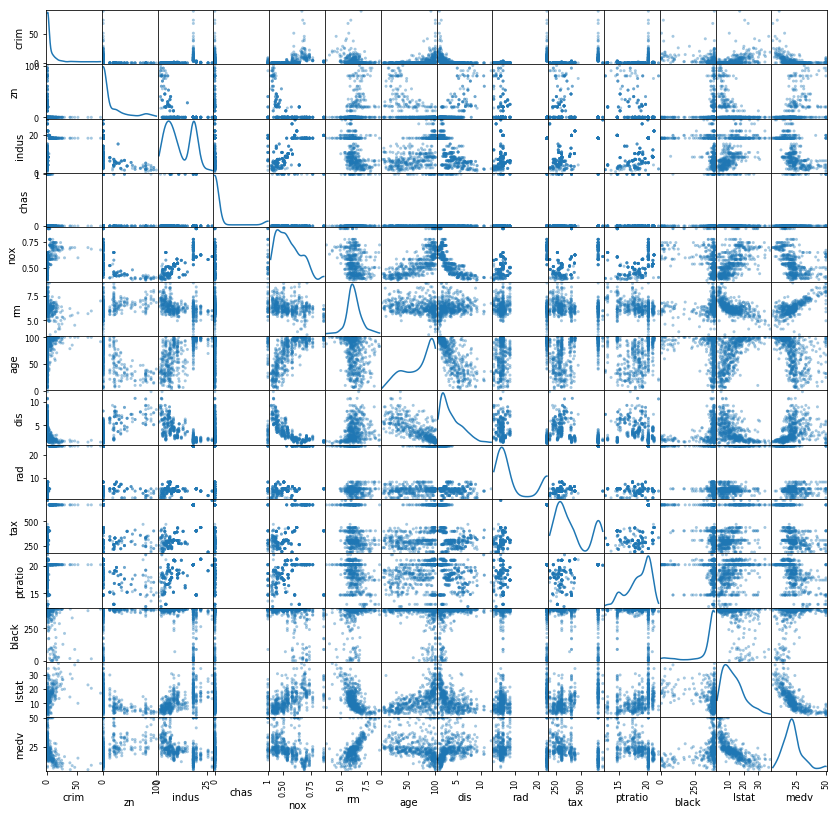

In [27]:
scatter_matrix(file, alpha=0.4, figsize=(14, 14), diagonal='kde')
plt.show()

If we compare the nedian value (medv) against other features in the data frame, we can see high correlations between medv & lstat (lower status of the population) and also medv & rm (average number of rooms per dwelling). lstat is negatively correlated to medv, whereas rm is positively correlated which would be expected as the higher value areas would typically have larger dwellings.

Lower correlation of median value is seen with chas and dis.

<b>(c) Are any of the predictors associated with per capita crime rate? If so, explain the relationship.</b>

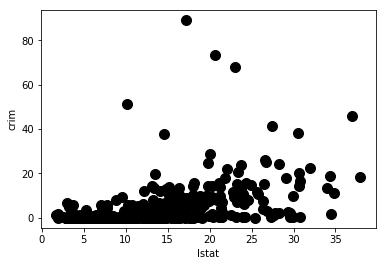

In [22]:
plt.scatter(file['lstat'], file['crim'], color='k', s=100)
plt.xlabel('lstat')
plt.ylabel('crim')
plt.show()

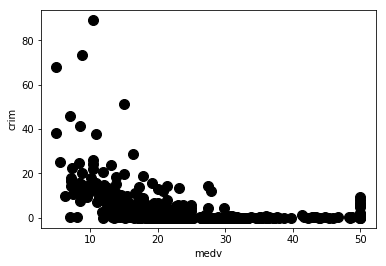

In [34]:
plt.scatter(file['medv'], file['crim'], color='k', s=100)
plt.xlabel('medv')
plt.ylabel('crim')
plt.show()

So we can see, as the value of 'lstat' goes up, the 'crim' value is also in a increasing trend; while as the value of 'medv' goes up, the 'crim' value is going down.

<b>(d) Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.</b>

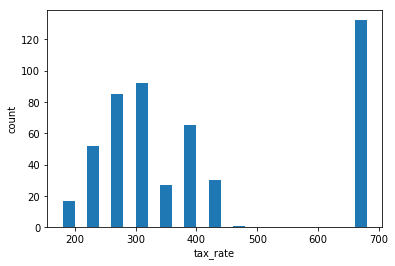

In [48]:
tax_rate_bins = np.arange(170, 720, 40)
plt.hist(file['tax'], tax_rate_bins, histtype='bar', rwidth=0.5)
plt.xlabel('tax_rate')
plt.ylabel('count')
plt.show()

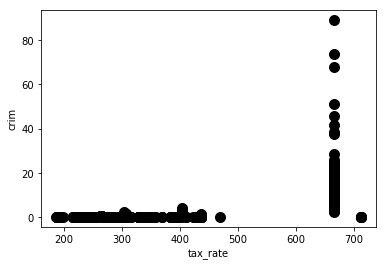

In [54]:
plt.scatter(file['tax'], file['crim'], color='k', s=100)
plt.xlabel('tax_rate')
plt.ylabel('crim')
plt.show()

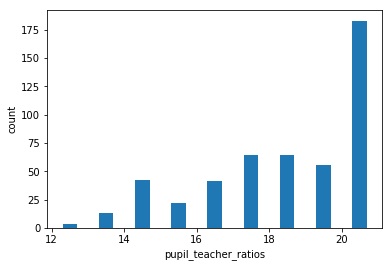

In [49]:
pupil_teacher_ratios_bins = np.arange(12, 22, 1)
plt.hist(file['ptratio'], pupil_teacher_ratios_bins, histtype='bar', rwidth=0.4)
plt.xlabel('pupil_teacher_ratios')
plt.ylabel('count')
plt.show()


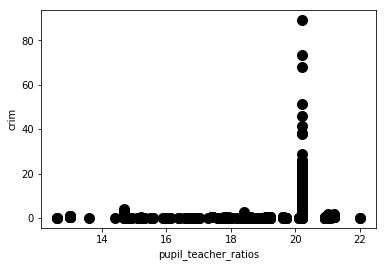

In [41]:
plt.scatter(file['ptratio'], file['crim'], color='k', s=100)
plt.xlabel('pupil_teacher_ratios')
plt.ylabel('crim')
plt.show()

Based on the histograms and scatter plot dragram, we can see both 

<b>(e) How many of the suburbs in this data set bound the Charles river?</b>

<b>(f) What is the median pupil-teacher ratio among the towns in this data set?</b> 

<b>(g) Which suburb of Boston has lowest median value of owner- occupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings.</b>

<b>(h) In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.</b>